***
# Final Case Study
MSDS 7333 Quantifying the World  
*Allison Roderick, Jenna Ford, and Will Arnost* 
***

## Table of Contents

<a href='#Section_1'> 1. Introduction </a>  
<a href='#Section_2'> 2. Question </a>  
<a href='#Section_3'> 3. Methods </a>  
<a href='#Section_3_a'> &nbsp;&nbsp;&nbsp; a. Dataset </a>  
<a href='#Section_3_b'> &nbsp;&nbsp;&nbsp; b. Neural Network Structure </a>  
<a href='#Section_3_c'> &nbsp;&nbsp;&nbsp; c. Other Considerations </a>  
<a href='#Section_4'> 4. Modeling </a>  
<a href='#Section_5'> 5. Results </a>  
<a href='#Section_6'> 6. Conclusion </a>  
<a href='#Section_7'> 7. References </a>  
<a href='#Section_8'> 8. Code </a>  

In [4]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

<a id = 'Section_1'></a>

## 1. Introduction

This week's case study involves replicating results produced in the paper "Searching for Exotic Particles in High-Energy Physics with Deep Learning" by Baldi, Sadowski, and Whiteson [1]. The 2014 paper looks to distinguish between particle collisions that produce exotic particles and those that do not. The authors investigate the use of deep neural networks to improve accuracy over other methods. 

We will attempt to replicate that paper's neural network architecture and performance. The packages used in the paper are outdated, so we will be using Tensorflow to build our network. We hope to get as close to their AUC of 0.885 as possible.

<a id = 'Section_2'></a>

## 2. Question

<a id = 'Section_3'></a>

## 3. Methods

This section gives an overview of what we know about the data and how we prepared the dataset for modeling.

<a id = 'Section_3_a'></a>

### 3a. Dataset

<a id = 'Section_3_b'></a>

### 3b. Neural Network Stucture

<a id = 'Section_3_c'></a>

### 3c. Other Considerations

<a id = 'Section_4'></a>

## 4. Modeling

<a id = 'Section_5'></a>

## 5. Results

<a id = 'Section_6'></a>

## 6. Conclusion

<a id = 'Section_7'></a>

## 7. References

<a id = 'Section_8'></a>

## 8. Code

### Load Packages

In [2]:
import numpy as np
import pandas as pd
import pandas_profiling

### Read in the Data

In [3]:
df = pd.read_csv("../final_project.csv")

In [4]:
# there are missing values
df.isnull().values.any()

True

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 51 columns):
x0     159974 non-null float64
x1     159975 non-null float64
x2     159962 non-null float64
x3     159963 non-null float64
x4     159974 non-null float64
x5     159963 non-null float64
x6     159974 non-null float64
x7     159973 non-null float64
x8     159979 non-null float64
x9     159970 non-null float64
x10    159957 non-null float64
x11    159970 non-null float64
x12    159964 non-null float64
x13    159969 non-null float64
x14    159966 non-null float64
x15    159965 non-null float64
x16    159974 non-null float64
x17    159973 non-null float64
x18    159960 non-null float64
x19    159965 non-null float64
x20    159962 non-null float64
x21    159971 non-null float64
x22    159973 non-null float64
x23    159953 non-null float64
x24    159972 non-null object
x25    159978 non-null float64
x26    159964 non-null float64
x27    159970 non-null float64
x28    159965 non-null

In [6]:
df.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
count,159974.000000,159975.000000,159962.000000,159963.000000,159974.000000,159963.000000,159974.000000,159973.000000,159979.000000,159970.000000,...,159960.000000,159974.000000,159963.000000,159960.000000,159971.000000,159969.000000,159963.000000,159968.000000,159968.000000,160000.000000
mean,-0.001028,0.001358,-1.150145,-0.024637,-0.000549,0.013582,-1.670670,-7.692795,-0.030540,0.005462,...,6.701076,-1.833820,-0.002091,-0.006250,0.000885,-12.755395,0.028622,-0.000224,-0.674224,0.401231
std,0.371137,6.340632,13.273480,8.065032,6.382293,7.670076,19.298665,30.542264,8.901185,6.355040,...,18.680196,5.110705,1.534952,4.164595,0.396621,36.608641,4.788157,1.935501,15.036738,0.490149
min,-1.592635,-26.278302,-59.394048,-35.476594,-28.467536,-33.822988,-86.354483,-181.506976,-37.691045,-27.980659,...,-82.167224,-27.933750,-6.876234,-17.983487,-1.753221,-201.826828,-21.086333,-8.490155,-65.791191,0.000000
25%,-0.251641,-4.260973,-10.166536,-5.454438,-4.313118,-5.148130,-14.780146,-27.324771,-6.031058,-4.260619,...,-5.804080,-5.162869,-1.039677,-2.812055,-0.266518,-36.428329,-3.216016,-1.320800,-10.931753,0.000000
50%,-0.002047,0.004813,-1.340932,-0.031408,0.000857,0.014118,-1.948594,-6.956789,-0.016840,0.006045,...,6.840110,-1.923754,-0.004385,-0.010484,0.001645,-12.982497,0.035865,-0.011993,-0.574410,0.000000
75%,0.248532,4.284220,7.871676,5.445179,4.306660,5.190749,11.446931,12.217071,5.972349,4.305734,...,19.266367,1.453507,1.033275,2.783274,0.269049,11.445443,3.268028,1.317703,9.651072,1.000000
max,1.600849,27.988178,63.545653,38.906025,26.247812,35.550110,92.390605,149.150634,39.049831,27.377842,...,100.050432,22.668041,6.680922,19.069759,1.669205,150.859415,20.836854,8.226552,66.877604,1.000000


In [ ]:
#profiling
# profile = df.profile_report(title="Final Jeopardy",pool_size=4)
# profile.to_file("final_jeopardy.html")

### Data Cleanup

In [10]:
# Fixing Numeric columns that imported as string
df['x32'] = df['x32'].replace('[\%,]', '', regex=True).astype(float)/100
df['x37'] = df['x37'].replace('[\$,]', '', regex=True).astype(float)
df['x29'] = df['x29'].replace('Dev', 'Dec', regex=True)
df['x29'] = df['x29'].replace('July', 'Jul', regex=True)
df['x29'] = df['x29'].replace('January', 'Jan', regex=True)
df['x29'] = df['x29'].replace('sept.', 'Sep', regex=True)

In [11]:
pd.set_option("display.max_rows", 500, "display.max_columns", None)
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,6.187465,13.251523,25.665413,-5.017267,10.503714,-2.517678,2.117910,5.865923,-6.666158,1.791497,-1.909114,-1.737940,-2.516715,3.553013,euorpe,-0.801340,1.142950,1.005131,-18.473784,Jul,tuesday,-3.851669,0.0000,-1.940031,-5.492063,0.627121,-0.873824,1313.96,-1.353729,-5.186148,-10.612200,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,-11.708859,-2.352809,-25.014934,9.799608,-10.960705,1.504000,-2.397836,-9.301839,-1.999413,5.045258,-5.809984,10.814319,-0.478112,10.590601,asia,0.818792,-0.642987,0.751086,3.749377,Aug,wednesday,1.391594,-0.0002,2.211462,-4.460591,1.035461,0.228270,1962.78,32.816804,-5.150012,2.147427,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,1.572647,-4.170771,12.078602,-5.158498,7.302780,-2.192431,-4.065428,-7.675055,4.041629,-6.633628,1.700321,-2.419221,2.467521,-5.270615,asia,-0.718315,-0.566757,4.171088,11.522448,Jul,wednesday,-3.262082,-0.0001,0.419607,-3.804056,-0.763357,-1.612561,430.47,-0.333199,8.728585,-0.863137,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,-2.000255,-19.286668,10.995330,-5.914378,2.511400,1.292362,-2.496882,-15.722954,-2.735382,1.117536,1.923670,-14.179167,1.470625,-11.484431,asia,-0.052430,-0.558582,9.215569,30.595226,Jul,wednesday,-2.285241,0.0001,-3.442715,4.420160,1.164532,3.033455,-2366.29,14.188669,-6.385060,12.084421,15.691546,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847,0
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,6.667530,1.965913,-28.106348,-1.258950,5.759941,0.472584,-1.150097,-14.118709,4.527964,-1.284372,-9.026317,-7.039818,-1.978748,-15.998166,asia,-0.223449,0.350781,1.811182,-4.094084,Jul,tuesday,0.921047,0.0001,-0.431640,12.165494,-0.167726,-0.341604,-620.66,-12.578926,1.133798,30.004727,-13.911297,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 51 columns):
x0     159974 non-null float64
x1     159975 non-null float64
x2     159962 non-null float64
x3     159963 non-null float64
x4     159974 non-null float64
x5     159963 non-null float64
x6     159974 non-null float64
x7     159973 non-null float64
x8     159979 non-null float64
x9     159970 non-null float64
x10    159957 non-null float64
x11    159970 non-null float64
x12    159964 non-null float64
x13    159969 non-null float64
x14    159966 non-null float64
x15    159965 non-null float64
x16    159974 non-null float64
x17    159973 non-null float64
x18    159960 non-null float64
x19    159965 non-null float64
x20    159962 non-null float64
x21    159971 non-null float64
x22    159973 non-null float64
x23    159953 non-null float64
x24    159972 non-null object
x25    159978 non-null float64
x26    159964 non-null float64
x27    159970 non-null float64
x28    159965 non-null

### Impute Missing Values

In [13]:
# Impute missing numeric
numb = df.select_dtypes(include='number').columns
df[numb] = df[numb].fillna(df[numb].median().to_dict())

In [14]:
# show columns with missing values still (only the categorical columns left)
for i in df.columns:
    if df.loc[df[i].isna(),i].shape[0]>0:
        print(i, df.loc[df[i].isna(),i].shape)

x24 (28,)
x29 (30,)
x30 (30,)


In [15]:
# fill missing categorical columns with the word 'Missing'
cats = df.select_dtypes(include='object').columns

df[cats] = df[cats].transform(lambda x: x.fillna('Missing'))

In [16]:
# show columns with missing values still (none)
for i in df.columns:
    if df.loc[df[i].isna(),i].shape[0]>0:
        print(i, df.loc[df[i].isna(),i].shape)

### Create Model Datasets

In [20]:
# drop x6 and x41
# x6 = x2 * 1.453925
# x41 = x38 * 1.105921
X = df.copy().drop(columns=["y"])
print("The shape of X is: ", X.shape)

y = df.loc[:,"y"].copy()
print("The shape of y is: ", y.shape)

The shape of X is:  (160000, 50)
The shape of y is:  (160000,)


### Normalize and One-Hot Encode the data

In [21]:
from sklearn.preprocessing import StandardScaler
def transform_data(data):
    #OH encode
    label_encode = data.select_dtypes(include='object').columns
    normalize = data.select_dtypes(include='number').columns

    data_OHE = pd.get_dummies(data, columns=label_encode)
    
    #Standardize the variables
    scaler = StandardScaler()
    data_OHE[normalize] = scaler.fit_transform(data_OHE[normalize])
 
    return data_OHE

In [22]:
X2 = transform_data(X)
display(X2)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x25,x26,x27,x28,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x24_Missing,x24_america,x24_asia,x24_euorpe,x29_Apr,x29_Aug,x29_Dec,x29_Feb,x29_Jan,x29_Jul,x29_Jun,x29_Mar,x29_May,x29_Missing,x29_Nov,x29_Oct,x29_Sep,x30_Missing,x30_friday,x30_monday,x30_thurday,x30_tuesday,x30_wednesday
0,-0.446058,-0.625059,0.434853,0.310829,-0.281989,0.103154,0.434754,-0.232398,-0.113491,-0.662595,0.785889,1.507768,1.830589,-0.561261,1.507268,-0.769972,0.423723,0.773434,-1.471070,0.232661,-0.380367,-0.181618,-0.466617,0.189905,-0.633551,1.356818,0.149007,-1.281721,-1.389773,0.001046,-1.106396,-0.685330,0.263178,-0.552575,1.313755,-0.438894,-1.010999,-0.486785,-0.438929,1.418299,-1.513949,0.403711,-0.668753,2.008931,-1.612152,0.078445,-0.489915,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,-0.401142,-0.092590,2.184324,0.517973,1.007145,-0.318226,2.184158,0.031663,0.104146,0.051099,-1.488004,-0.271764,-1.605533,1.093712,-1.575223,0.459369,-0.482390,-1.230581,-0.443183,0.661100,-1.052294,1.152486,-0.089903,0.662008,0.648640,-0.761327,0.111501,0.257502,0.505044,-1.922310,1.269235,-0.556607,0.434798,0.139242,1.962659,1.584238,-1.003960,0.261950,1.584323,1.237653,0.498220,1.568880,2.539292,0.780253,-1.028765,-0.165378,1.156898,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,-0.864117,-0.225734,1.009787,0.819873,-0.831135,-1.476650,1.009666,0.614063,0.601806,-0.415214,0.199534,-0.479086,0.909405,-0.577035,1.047584,-0.670551,-0.817003,-1.015645,0.887405,-0.876716,0.241360,-0.254028,0.454422,-0.402011,-0.567844,-0.670917,0.616418,0.795881,-1.176707,-0.960632,0.243872,-0.474674,-0.321222,-1.016301,0.430150,-0.378472,1.699345,0.085290,-0.378503,2.137400,-0.448141,-0.654377,1.899509,1.191419,-1.557610,-1.080233,-0.478558,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,-0.659021,0.800509,-1.732948,0.454106,1.019525,0.296857,-1.732962,-0.367422,-0.034436,-0.877112,-0.254436,-2.202916,0.835959,-0.661464,0.359497,0.394676,-0.502264,-2.078959,-0.605286,0.143918,0.279832,-1.503922,0.270205,-0.818853,-0.040855,-0.661222,1.361168,2.116902,-0.823695,0.962724,-1.966285,0.551668,0.489044,1.900138,-2.366972,0.481324,-1.244525,0.845053,0.481343,-1.102473,1.917474,-1.541250,1.056248,-1.630082,1.113870,0.933341,-0.465351,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,-0.733857,0.048101,-0.768724,0.210985,0.458963,-0.082200,-0.768776,1.153419,0.138222,-0.678986,0.846885,0.220747,-1.815131,-0.141475,0.826018,0.144087,-0.232023,-1.867001,0.994524,-0.172353,-1.606310,-0.745123,-0.367206,-1.121648,-0.176202,0.417295,0.268009,-0.285753,0.334997,0.962724,-0.243241,1.518249,-0.070886,-0.218485,-0.621116,-1.103504,0.220015,1.896616,-1.103578,-0.664564,1.163705,0.951968,-0.246791,-0.036334,-0.049498,-0.462313,1.090704,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159995,-1.309589,-0.673746,0.118113,-0.244019,0.275489,-0.154046,0.118027,1.597177,-0.212644,-0.374491,-0.097816,-1.435799,-1.079819,0.171087,-1.348465,0.581124,0.663369,-0.701101,-0.505468,-0.014671,-0.320516,-0.697041,1.055926,0.367743,0.125562,0.571108,0.054634,1.948343,0.938940,0.001046,1.324623,-0.780613,-0.133254,-1.483602,-0.892451,-0.861474,0.481424,-0.159377,-0.861534,1.943269,-0.568841,-0.338020,-0.919989,0.767514,0.905588,-1.979672,1.933069,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
159996,2.227142,0.757558,1.756477,1.413174,0.268962,0.909770,1.756328,-0.150145,-0.430371,1.055904,-0.823173,-0.986539,-1.528971,0.371886,-1.167562,1.231081,-0.008203,0.826907,1.585016,0.040006,0.234384,-1.708560,-0.906572,0.743386,-0.975301,-0.851959,-0.348621,-1.247645,2.527407,-0.960632,0.702462,-0.932502,0.385921,-1.090294,1.588

In [23]:
X2.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x25,x26,x27,x28,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x24_Missing,x24_america,x24_asia,x24_euorpe,x29_Apr,x29_Aug,x29_Dec,x29_Feb,x29_Jan,x29_Jul,x29_Jun,x29_Mar,x29_May,x29_Missing,x29_Nov,x29_Oct,x29_Sep,x30_Missing,x30_friday,x30_monday,x30_thurday,x30_tuesday,x30_wednesday
count,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000
mean,4.495571e-17,8.381663e-18,-5.851916e-17,-2.656070e-17,-2.693817e-17,-5.459522e-18,2.265896e-17,-3.236716e-17,7.825962e-17,-2.466430e-17,-1.607672e-17,3.346351e-17,-4.880558e-18,2.208997e-17,1.103978e-17,5.279110e-17,4.025617e-17,6.113721e-17,-1.044789e-17,2.395618e-17,3.190642e-17,2.144812e-17,4.129856e-17,2.280537e-17,-3.947676e-17,-1.163271e-17,-1.804390e-17,-3.407136e-17,2.714634e-17,-6.913511e-16,2.200323e-17,-1.725980e-17,6.247780e-18,-3.821041e-17,2.422229e-17,1.218040e-16,1.371091e-17,-1.804668e-17,-4.498901e-17,-4.980044e-18,-3.429271e-17,-4.653257e-17,2.181588e-18,1.038891e-17,4.346523e-17,1.336292e-17,-2.825240e-17,0.000175,0.027931,0.868531,0.103362,0.042256,0.183787,0.000144,0.000875,0.000056,0.284806,0.258306,0.007694,0.137119,0.000188,0.002106,0.015044,0.067619,0.000188,0.003525,0.003050,0.183931,0.174712,0.634594
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,0.013228,0.164776,0.337913,0.304433,0.201174,0.387312,0.011989,0.029568,0.007500,0.451324,0.437705,0.087376,0.343974,0.013692,0.045846,0.121727,0.251091,0.013692,0.059267,0.055143,0.387429,0.379722,0.481545
min,-4.288823e+00,-4.144980e+00,-4.388522e+00,-4.396283e+00,-4.460683e+00,-4.412028e+00,-4.388434e+00,-5.691441e+00,-4.231245e+00,-4.404195e+00,-4.613370e+00,-4.347593e+00,-4.262139e+00,-4.326084e+00,-4.439441e+00,-5.197628e+00,-5.226939e+00,-4.546090e+00,-4.451716e+00,-4.695258e+00,-4.646718e+00,-4.620455e+00,-4.370773e+00,-4.518880e+00,-5.036419e+00,-4.573763e+00,-4.724281e+00,-5.051167e+00,-4.438996e+00,-4.807344e+00,-4.260227e+00,-4.507126e+00,-4.206687e+00,-4.314053e+00,-4.735530e+00,-4.757674e+00,-4.305838e+00,-4.209855e+00,-4.757965e+00,-5.107341e+00,-4.478939e+00,-4.317236e+00,-4.423039e+00,-5.165182e+00,-4.410353e+00,-4.386876e+00,-4.330973e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.751325e-01,-6.721857e-01,-6.791459e-01,-6.730523e-01,-6.755947e-01,-6.729232e-01,-6.792013e-01,-6.426318e-01,-6.740

### EDA

In [24]:
cols_corr = ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20',
       'x21', 'x22', 'x23', 'x25', 'x26', 'x27', 'x28', 'x31', 'x32', 'x33',
       'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43',
       'x44', 'x45', 'x46', 'x47', 'x48', 'x49']

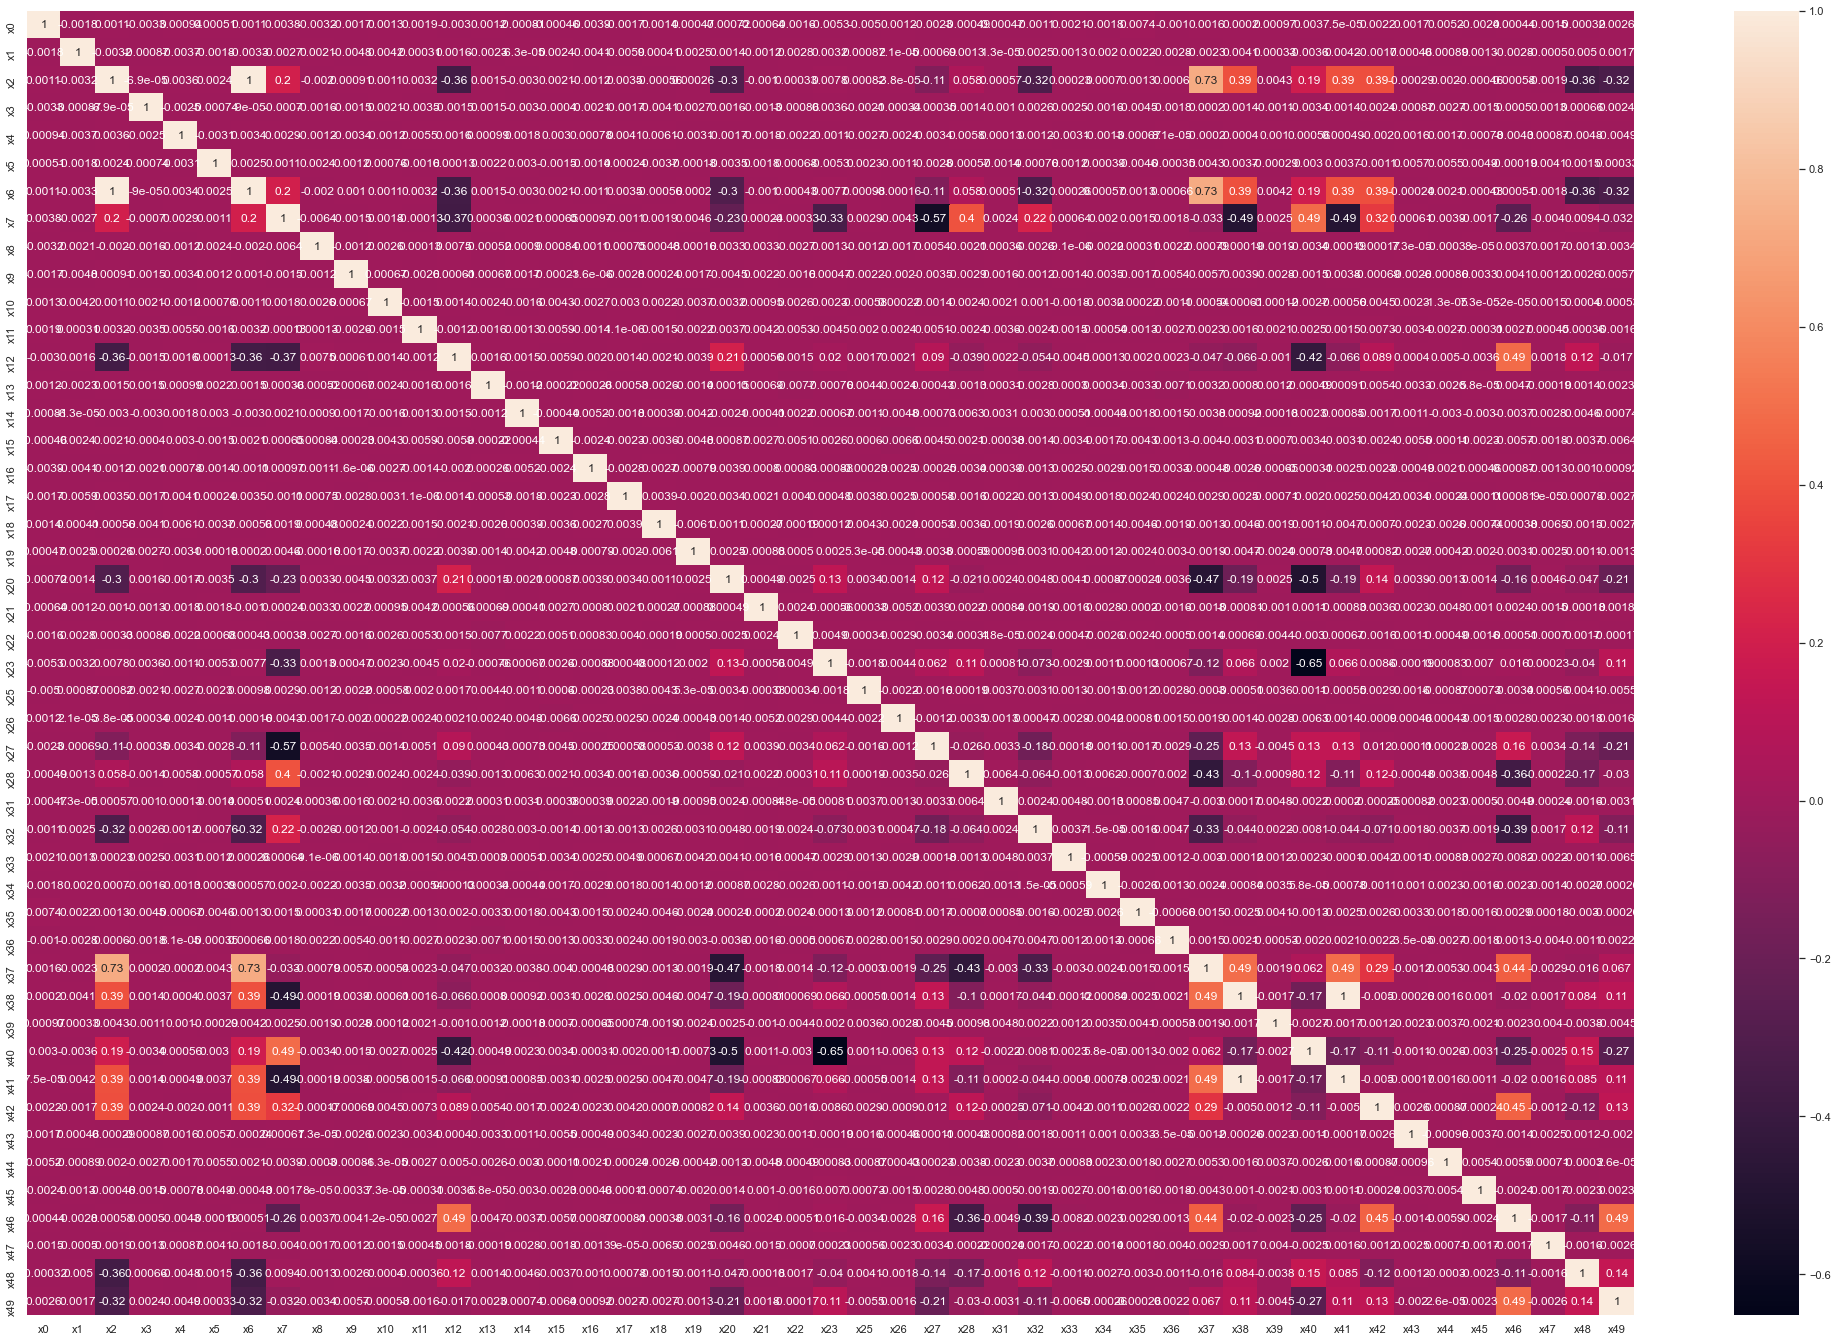

In [19]:
import seaborn as sns
sns.set(rc={'figure.figsize':(36,24)})
sns.heatmap(X2[cols_corr].corr(), annot = True)

In [29]:
# X2, X6
# X38, x41
check = df[['x2','x6']].copy()
check['check'] = (check.x6-check.x2) / check.x2
check.head(20)

,x2,x6,check
0,4.621113,6.718751,0.453925
1,27.839856,40.477058,0.453925
2,12.251561,17.812850,0.453925
3,-24.149632,-35.111751,0.453925
4,-11.352593,-16.505817,0.453925
5,10.831367,15.747993,0.453925
6,-7.412661,-10.777451,0.453925
7,-6.731169,-9.786614,0.453925
8,0.774836,1.126553,0.453925
9,-3.355872,-4.879186,0.453925


In [30]:
check = df[['x38','x41']].copy()
check['check'] = (check.x41-check.x38) / check.x38
check.head(20)

,x38,x41,check
0,-1.353729,-1.497117,0.105921
1,32.816804,36.292790,0.105921
2,-0.333199,-0.368491,0.105921
3,14.188669,15.691546,0.105921
4,-12.578926,-13.911297,0.105921
5,-6.555903,-7.250310,0.105921
6,-14.102935,-15.596731,0.105921
7,17.885994,19.780494,0.105921
8,-23.704439,-26.215235,0.105921
9,17.421890,19.267232,0.105921


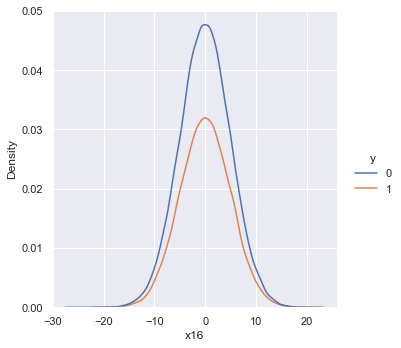

In [22]:
sns.displot(df, x="x16", hue="y", kind="kde")



In [32]:
df.y.value_counts()

0    95803
1    64197
Name: y, dtype: int64

### Create the Train/Test Split

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2.drop(columns=['x6','x41']),y,test_size=.2, random_state=42)

### Custom Scorer

In [35]:
from sklearn.metrics import confusion_matrix, make_scorer,accuracy_score
def myscore(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    tn_score = tn * 0
    tp_score = tp * 0
    fp_score = fp * -25
    fn_score = fn * -125
    score = tn_score + tp_score + fp_score + fn_score
    return score

willScore = make_scorer(myscore)

### LightGBM

In [45]:
%%time
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold

model = LGBMClassifier()
param_grid = {
    'objective':['binary'],
    'n_estimators': [100,200,300,400],
    'learning_rate':[.001,.005,0.01,0.05,0.1],
    'num_leaves': [20,31,40,50],
    'tree_learner':['serial','feature'],
    'min_split_gain': [.0001,.001,.005,0.01,0.05,0.1],
    'feature_fraction': [0.8,0.9,1],
    'min_data_in_leaf': [10,20,50,100],
    'max_depth':[-1,5,10,15,20,25,30],
    'seed': [123]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
n_iter_search = 1000

lgbm = RandomizedSearchCV(estimator=LGBMClassifier(),param_distributions=param_grid,cv=cv,n_jobs=-1,verbose=2,
                          random_state=42,n_iter=n_iter_search,scoring=willScore)
lgbm_fit = lgbm.fit(X_train,y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 26.4min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 47.0min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 73.4min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 105.8min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 142.2min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 185.5min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed: 235.5min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 289.0min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed: 344.8min
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed: 352.2min finished


Wall time: 5h 52min 21s


In [46]:
lgbm_cv_results = pd.DataFrame(lgbm.cv_results_).sort_values('rank_test_score')
lgbm_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_tree_learner,param_seed,param_objective,param_num_leaves,param_n_estimators,param_min_split_gain,param_min_data_in_leaf,param_max_depth,param_learning_rate,param_feature_fraction,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
548,48.129711,0.513015,2.294066,0.169050,serial,123,binary,50,400,0.005,100,10,0.1,1,"{'tree_learner': 'serial', 'seed': 123, 'objec...",-134100.0,-146425.0,-143975.0,-135375.0,-131625.0,-138300.0,5813.303708,1
313,49.798847,1.125001,2.105570,0.128140,serial,123,binary,50,400,0.1,50,15,0.1,1,"{'tree_learner': 'serial', 'seed': 123, 'objec...",-137375.0,-147875.0,-141500.0,-135900.0,-139500.0,-140430.0,4178.319040,2
474,44.770095,0.369947,2.158229,0.191948,feature,123,binary,50,400,0.05,100,25,0.1,0.9,"{'tree_learner': 'feature', 'seed': 123, 'obje...",-136450.0,-145950.0,-142375.0,-144800.0,-134850.0,-140885.0,4456.276473,3
211,46.386770,0.554744,2.237818,0.057342,serial,123,binary,50,400,0.1,50,20,0.1,0.9,"{'tree_learner': 'serial', 'seed': 123, 'objec...",-136725.0,-145575.0,-148050.0,-137875.0,-137375.0,-141120.0,4727.430592,4
448,51.568122,2.827896,2.028576,0.101703,feature,123,binary,50,400,0.001,50,15,0.1,1,"{'tree_learner': 'feature', 'seed': 123, 'obje...",-138775.0,-143025.0,-144275.0,-143325.0,-138250.0,-141530.0,2503.617383,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,11.324121,0.209694,0.580647,0.041562,feature,123,binary,20,100,0.001,10,5,0.001,0.9,"{'tree_learner': 'feature', 'seed': 123, 'obje...",-1284375.0,-1284375.0,-1284375.0,-1284500.0,-1284500.0,-1284425.0,61.237244,888
263,12.804363,0.436738,0.646073,0.034418,serial,123,binary,20,100,0.05,10,-1,0.001,0.8,"{'tree_learner': 'serial', 'seed': 123, 'objec...",-1284375.0,-1284375.0,-1284375.0,-1284500.0,-1284500.0,-1284425.0,61.237244,888
908,17.202204,0.381414,0.638494,0.093118,serial,123,binary,31,100,0.01,50,25,0.001,1,"{'tree_learner': 'serial', 'seed': 123, 'objec...",-1284375.0,-1284375.0,-1284375.0,-1284500.0,-1284500.0,-1284425.0,61.237244,888
920,12.507956,0.126888,0.640687,0.040111,feature,123,binary,50,100,0.1,10,5,0.001,0.9,"{'tree_learner': 'feature', 'seed': 123, 'obje...",-1284375.0,-1284375.0,-1284375.0,-1284500.0,-1284500.0,-1284425.0,61.237244,888


In [47]:
# Display the parameters and evaluation metrics (accuracy and log loss) of the best model in terms of highest test accuracy
tempdf = lgbm_cv_results[['param_n_estimators', 'param_learning_rate', 'param_num_leaves', 'param_tree_learner',
                          'param_min_split_gain','param_feature_fraction','param_min_data_in_leaf','param_max_depth',
                          'mean_test_score']]

tempdf1= pd.DataFrame(tempdf.iloc[0, :])
tempdf1

,548
param_n_estimators,400
param_learning_rate,0.1
param_num_leaves,50
param_tree_learner,serial
param_min_split_gain,0.005
param_feature_fraction,1
param_min_data_in_leaf,100
param_max_depth,10
mean_test_score,-138300


In [48]:
# Predict on hold-out test set
lgbm_model = lgbm.best_estimator_

pred = lgbm_model.predict(X_test)
pred_prob = lgbm_model.predict_proba(X_test)

from sklearn import metrics

print('Model Performance')
print("Dollar Loss: ", willScore(lgbm_model, X_test,y_test))
print("Accuracy:",metrics.accuracy_score(y_test, pred))
print(confusion_matrix(y_test,pred))

Model Performance
Dollar Loss:  -162575
Accuracy: 0.93665625
[[18272   908]
 [ 1119 11701]]


### Random Forest

In [66]:
from sklearn.metrics import confusion_matrix, make_scorer,accuracy_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold

clf = RandomForestClassifier(random_state=42, n_jobs=-1)
# Create stratified 5-fold CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Tune the following parameters
n_estimators= [100,200,500]
max_features = ['auto', 'sqrt']
min_samples_split = [5, 10, 100]
min_samples_leaf = [2,5,10]
max_depth = [5, 10, 20,30,40,50]
min_impurity_decrease = [0.0, 0.01]
warm_start = ['True']

param_dist = {'n_estimators': n_estimators,
              'max_features': max_features,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'min_impurity_decrease': min_impurity_decrease,
              'max_depth':max_depth,
              'warm_start':warm_start
#               'verbose' : [1]
             }

In [67]:
%%time
n_iter_search = 50
rf_random_search = RandomizedSearchCV(clf, param_distributions=param_dist, scoring=willScore, cv = cv, random_state=42,
                                      n_iter=n_iter_search)
rf_random_search.fit(X_train, y_train)

Wall time: 45min 5s


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_iter=50,
                   param_distributions={'max_depth': [5, 10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_impurity_decrease': [0.0, 0.01],
                                        'min_samples_leaf': [2, 5, 10],
                                        'min_samples_split': [5, 10, 100],
                                        'n_estimators': [100, 200, 500],
                                        'warm_start': ['True']},
                   random_state=42, scoring=make_scorer(myscore))

In [68]:
rf_cv_results_df = pd.DataFrame(rf_random_search.cv_results_)
#
rf_cv_results_df.sort_values(by=['rank_test_score'])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_warm_start,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_min_impurity_decrease,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
49,39.184754,0.442950,0.386307,0.006132,True,500,10,2,0,auto,40,"{'warm_start': 'True', 'n_estimators': 500, 'm...",-186925.0,-194150.0,-200325.0,-192475.0,-186100.0,-191995.0,5190.746574,1
17,16.750271,0.584340,0.183970,0.007599,True,200,10,2,0,sqrt,50,"{'warm_start': 'True', 'n_estimators': 200, 'm...",-186725.0,-196650.0,-200750.0,-193250.0,-189600.0,-193395.0,4971.981496,2
10,38.886306,1.528445,0.378538,0.009728,True,500,5,5,0,sqrt,50,"{'warm_start': 'True', 'n_estimators': 500, 'm...",-190900.0,-202000.0,-208100.0,-201550.0,-195875.0,-199685.0,5853.921762,3
1,13.962785,0.237388,0.150230,0.002717,True,200,10,2,0,auto,20,"{'warm_start': 'True', 'n_estimators': 200, 'm...",-193575.0,-203025.0,-209425.0,-201500.0,-193850.0,-200275.0,5982.578875,4
47,14.822789,0.050858,0.164698,0.003229,True,200,5,2,0,sqrt,20,"{'warm_start': 'True', 'n_estimators': 200, 'm...",-195950.0,-202025.0,-206850.0,-199900.0,-196725.0,-200290.0,3943.114251,5
11,38.193037,0.423455,0.376737,0.009611,True,500,5,5,0,sqrt,20,"{'warm_start': 'True', 'n_estimators': 500, 'm...",-197400.0,-205850.0,-210750.0,-203425.0,-198875.0,-203260.0,4825.002591,6
25,15.039203,0.107557,0.158755,0.004149,True,200,10,10,0,auto,30,"{'warm_start': 'True', 'n_estimators': 200, 'm...",-208000.0,-213925.0,-222725.0,-212650.0,-208900.0,-213240.0,5235.947861,7
46,14.112849,0.108144,0.149335,0.002564,True,200,10,10,0,sqrt,50,"{'warm_start': 'True', 'n_estimators': 200, 'm...",-208325.0,-217425.0,-221775.0,-211850.0,-209250.0,-213725.0,5122.377378,8
28,7.890989,0.047057,0.099089,0.000539,True,100,10,10,0,sqrt,40,"{'warm_start': 'True', 'n_estimators': 100, 'm...",-208325.0,-217250.0,-221725.0,-214925.0,-209800.0,-214405.0,4901.413062,9
48,13.940730,0.061925,0.149496,0.004091,True,200,10,10,0,sqrt,20,"{'warm_start': 'True', 'n_estimators': 200, 'm...",-210650.0,-219125.0,-226300.0,-215950.0,-212750.0,-216955.0,5486.036821,10


In [69]:
# Display the parameters and evaluation metric of the best model in terms of highest test accuracy
tempdf = rf_cv_results_df[['param_n_estimators', 'param_min_samples_split', 'param_min_samples_leaf',
                      'param_min_impurity_decrease', 'param_max_features', 'mean_test_score']]

tempdf1= pd.DataFrame(tempdf.iloc[0, :])
tempdf1

,0
param_n_estimators,500
param_min_samples_split,10
param_min_samples_leaf,5
param_min_impurity_decrease,0.01
param_max_features,sqrt
mean_test_score,-1.28442e+06


In [70]:
# Predict on hold-out test set
rf_model = rf_random_search.best_estimator_

pred = rf_model.predict(X_test)

from sklearn import metrics
print("Dollar Loss: ", willScore(rf_model, X_test,y_test))
print("Accuracy: ",accuracy_score(y_test,pred))
#print('Model Performance')
#print("Mean Squared Error:",willScore(y_test, pred))

Dollar Loss:  -223625
Accuracy:  0.92346875


In [71]:
confusion_matrix(y_test,pred)

array([[18355,   825],
       [ 1624, 11196]], dtype=int64)

[Text(0.5, 1.0, 'Feature Importance: RF')]

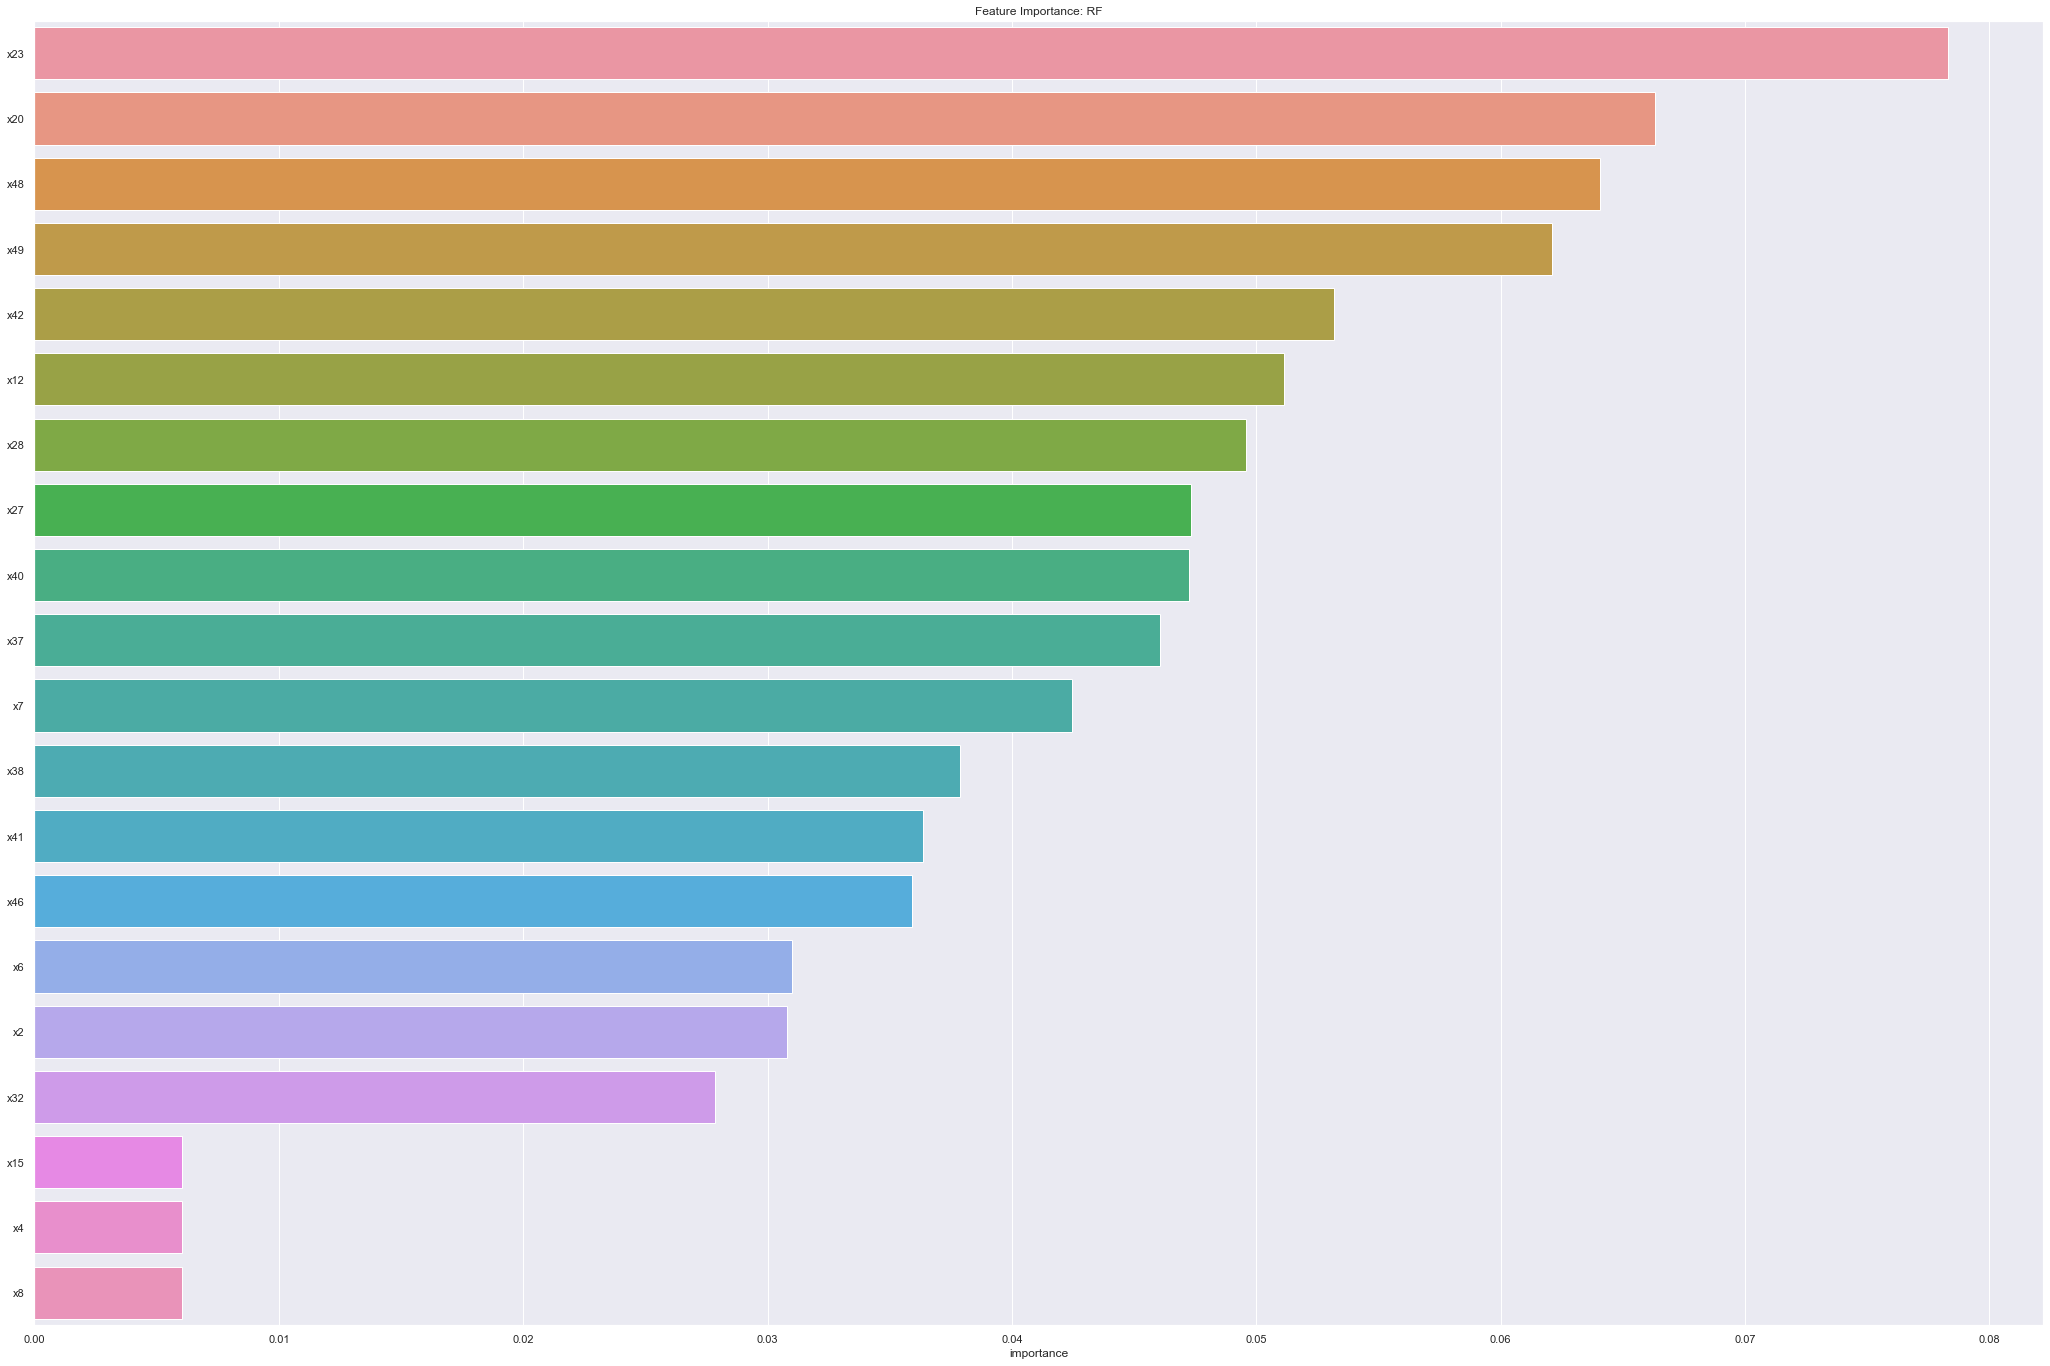

In [72]:
import seaborn as sns
feature_importances = pd.DataFrame(rf_model.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

sns.barplot(x="importance", y=feature_importances.index.values[0:20], data=feature_importances.iloc[0:20,:]).set(title='Feature Importance: RF')